In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import pandas as pd
import os
import sys
import re
import seaborn as sns
import matplotlib.dates as mdates

rel_path = '..//..//Database//'
result_set = ['20240405-142258', '20240406-002921', '20240406-090925']
total_order = 16510

start_time = pd.to_datetime("2022-06-10 06:00:00 AM")
end_time = pd.to_datetime("2022-06-10 10:00:00 AM")

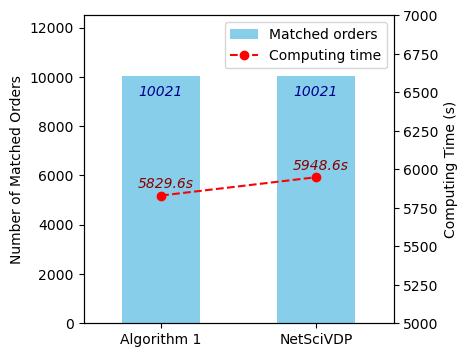

In [15]:
df_offline = pd.read_csv("..//..//Database//offline_result//Feb//match_result_weight_F.csv", index_col=0)
fig,ax = plt.subplots(figsize = (4,4))


plt.bar(df_offline.index, df_offline['match_result'], width=0.5, label='Matched orders', color= 'skyblue')
for i,j in zip(df_offline.index, df_offline['match_result']):
    ax.annotate(str(j),xy=(i-0.15,j-800), color='darkblue', style='italic')
plt.xticks([0,1], ['Algorithm 1', 'NetSciVDP'])
plt.xlim(-0.5, 1.5)
plt.ylim(0, 12500)
# plt.xlabel('Offline Matching Algorithms')
plt.ylabel('Number of Matched Orders')



ax2 = ax.twinx()
plt.plot(df_offline.index, df_offline['time'], color = 'red', linestyle = '--', marker='o', label='Computing time', axes=ax2)
for i,j in zip(df_offline.index, df_offline['time']):
    ax2.annotate(str(round(j,1)) +'s',xy=(i-0.15,j+50), color='darkred', style='italic')

ax2.set_ylabel('Computing Time (s)')
ax2.set_ylim(5000, 7000)

handle, label = ax.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax.legend(handle+handle2, label+label2, loc='upper right')

plt.savefig(rel_path + "offline_result//" +"//Feb//"+ 'offline_result.png', dpi=300, bbox_inches='tight')


-7.981158090520624 10.04107365199072


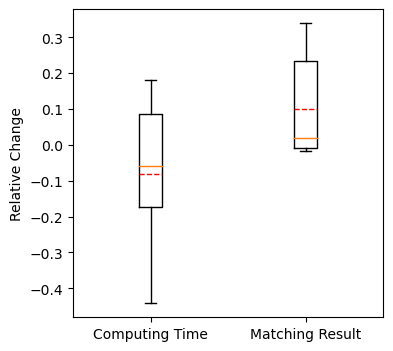

In [3]:
# df_online1 = pd.read_csv(rel_path + "20240204-155640//match_result_mpc.csv", index_col=0)
# df_online2 = pd.read_csv(rel_path + "20240208-094940//match_result_mpc.csv", index_col=0)

df_online = pd.read_csv(rel_path + "online_result//"+ result_set[2] +"//match_result_mpc_sp_120_2022-06-10.csv", index_col=0)
# df_online2 = pd.read_csv(rel_path + "online_result//"+ result_set[2] +"/match_result_mpc_sp_60_2022-06-10.csv", index_col=0)

# df_online = pd.concat([df_online1, df_online2], axis=0).reset_index(drop=True)

df_online_t = df_online[df_online["weight"] == "T"].reset_index(drop=True)
df_online_f = df_online[df_online["weight"] == "F"].reset_index(drop=True)
df_online_t["time_delta"] = (df_online_t["time"] - df_online_f["time"]) / df_online_f["time"]
df_online_t["match_result_delta"] = (df_online_t["match_result"] - df_online_f["match_result"]) / df_online_f["match_result"]

fig, ax = plt.subplots(figsize=(4, 4))
plt.boxplot(df_online_t[["time_delta", "match_result_delta"]],labels=['Computing Time', 'Matching Result'], 
    showmeans=True,
    meanline=True,
    meanprops={"color": "r", "linestyle": "--"},
)
plt.ylabel('Relative Change')
plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_result_compare.png', dpi=300, bbox_inches='tight')

print(df_online_t['time_delta'].mean() *100, df_online_t['match_result_delta'].mean()*100)
# sns.stripplot(df_online_t[["time_delta", "match_result_delta"]], color="r", marker="o", jitter=0.2, size=10)

In [4]:
df_online

,match_result,time,weight,opt_int,roll_int,locked_int
0,7958,12943.159466,T,60,30,40
1,8034,13762.467482,F,60,30,40
2,7951,19170.512533,T,60,20,30
3,8039,16228.813425,F,60,20,30
4,7841,15209.537561,T,30,10,20
5,7698,16993.313655,F,30,10,20
6,7676,15258.388135,T,30,10,15
7,7758,14062.300861,F,30,10,15
8,8658,30054.616325,T,30,5,10
9,8798,27366.616757,F,30,5,10


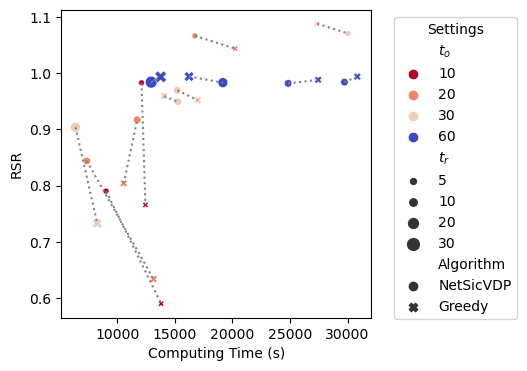

In [5]:
df_online['Algorithm'] = ['NetSicVDP', 'Greedy'] * int(len(df_online)/2)
df_online['RSR'] = df_online['match_result'] / total_order
df_online.columns = ['match_result', 'time','weight', '$t_o$', '$t_r$', '$t_l$', 'Algorithm', 'RSR']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="time",
    y="RSR",
    hue="$t_o$",
    size="$t_r$",
    style="Algorithm",
    palette=plt.get_cmap('coolwarm').reversed(),
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="time",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Settings')
plt.xlabel('Computing Time (s)')
plt.ylabel('RSR')

plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_time_rsr_result_color.png', dpi=300, bbox_inches='tight')

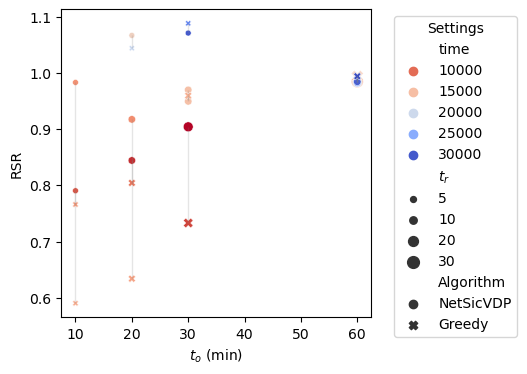

In [6]:
df_online['Algorithm'] = ['NetSicVDP', 'Greedy'] * int(len(df_online)/2)
df_online['RSR'] = df_online['match_result'] / total_order
df_online.columns = ['match_result', 'time','weight', '$t_o$', '$t_r$', '$t_l$', 'Algorithm', 'RSR']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="$t_o$",
    y="RSR",
    hue="time",
    size="$t_r$",
    style="Algorithm",
    palette=plt.get_cmap('coolwarm').reversed(),
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="$t_o$",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Settings')
plt.xlabel('$t_o$ (min)')
plt.ylabel('RSR')

plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_time_rsr_result_color1.png', dpi=300, bbox_inches='tight')

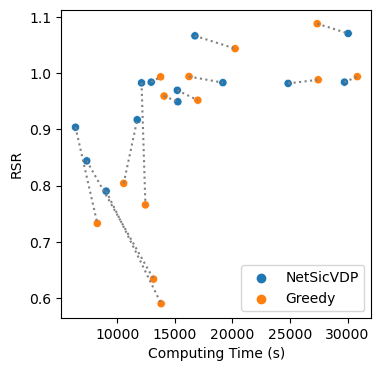

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(
    data=df_online,
    x="time",
    y="RSR",
    hue="Algorithm",
)
for i in range(int(len(df_online)/2)):
    temp = df_online.iloc[2*i : 2*i+2]
    sns.lineplot(
        data=temp,
        x="time",
        y="RSR",
        color='grey', 
        linestyle='dotted'
    )
plt.legend(loc='lower right')
plt.xlabel('Computing Time (s)')
plt.ylabel('RSR')
plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_time_rsr_result.png', dpi=300, bbox_inches='tight')

In [8]:
df = pd.read_csv("..//..//experiments//para_log_combine.csv")
newdf = df.loc[df.index.repeat((60*4 / df.roll).round().astype(int))]

time_list = []
for i in (60*4 / df.roll).round().astype(int):
    temp = pd.date_range(
        start=start_time,
        end=end_time,
        freq=str(60*4 / i) + "min",
    ).tolist()[1:]
    time_list.extend(temp)

newdf["time"] = time_list
newdf.set_index(["opt", "roll", "locked", "weight"], inplace=True)

In [9]:
dic = {}

for path in result_set:
    folder = rel_path + "online_result//" + path + '/result_analysis'
    print(folder)
    os.makedirs(folder, exist_ok=True) 
    files = os.listdir(rel_path + "online_result//" + path)
    for file in files:
        if (file.endswith(".txt")& (('log' in file)== False)):
            n_int = re.search(r"\d{2}_\d*_\d*", file)
            weight = re.search(r"\w.txt", file).group(0)[0]
            temp = str([int(s) for s in n_int.group(0).split('_') if s.isdigit()] + [str(weight)])
            val = []
            filename_a = rel_path + "online_result//" + path+"/"+file
            # print(filename_a)
            with open(filename_a, "r") as f:
                for line in f:
                    m = re.search(r"Total matched order so far (\d*)", line)
                    if m:
                        val.append(m.group(1))

            dic[temp] = np.array(val).astype(int)

..//..//Database//online_result//20240405-142258/result_analysis
..//..//Database//online_result//20240406-002921/result_analysis
..//..//Database//online_result//20240406-090925/result_analysis


In [10]:
for key in dic.keys():
    # print(key)
    try:
        key1 = eval(key)
        newdf.loc[tuple(key1), "matched"] = dic[key]
    except:
        pass

/tmp/ipykernel_31437/430930891.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  newdf.loc[tuple(key1), "matched"] = dic[key]
/tmp/ipykernel_31437/430930891.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  newdf.loc[tuple(key1), "matched"] = dic[key]


In [11]:
newdf.reset_index(inplace=True)
newdf

,opt,roll,locked,weight,time,matched
0,60,30,40,T,2022-06-10 06:30:00,875.0
1,60,30,40,T,2022-06-10 07:00:00,1709.0
2,60,30,40,T,2022-06-10 07:30:00,2726.0
3,60,30,40,T,2022-06-10 08:00:00,3852.0
4,60,30,40,T,2022-06-10 08:30:00,4946.0
...,...,...,...,...,...,...
731,60,10,30,F,2022-06-10 09:20:00,7231.0
732,60,10,30,F,2022-06-10 09:30:00,7603.0
733,60,10,30,F,2022-06-10 09:40:00,8037.0
734,60,10,30,F,2022-06-10 09:50:00,8037.0


In [12]:
newdf['time'] = pd.to_datetime(newdf['time'], format = '%H:%M:%S')
newdf

,opt,roll,locked,weight,time,matched
0,60,30,40,T,2022-06-10 06:30:00,875.0
1,60,30,40,T,2022-06-10 07:00:00,1709.0
2,60,30,40,T,2022-06-10 07:30:00,2726.0
3,60,30,40,T,2022-06-10 08:00:00,3852.0
4,60,30,40,T,2022-06-10 08:30:00,4946.0
...,...,...,...,...,...,...
731,60,10,30,F,2022-06-10 09:20:00,7231.0
732,60,10,30,F,2022-06-10 09:30:00,7603.0
733,60,10,30,F,2022-06-10 09:40:00,8037.0
734,60,10,30,F,2022-06-10 09:50:00,8037.0


In [13]:
newdf['Alg'] = newdf['weight'].map({'T': 'NetSciVDP', 'F': 'Greedy'})
newdf

,opt,roll,locked,weight,time,matched,Alg
0,60,30,40,T,2022-06-10 06:30:00,875.0,NetSciVDP
1,60,30,40,T,2022-06-10 07:00:00,1709.0,NetSciVDP
2,60,30,40,T,2022-06-10 07:30:00,2726.0,NetSciVDP
3,60,30,40,T,2022-06-10 08:00:00,3852.0,NetSciVDP
4,60,30,40,T,2022-06-10 08:30:00,4946.0,NetSciVDP
...,...,...,...,...,...,...,...
731,60,10,30,F,2022-06-10 09:20:00,7231.0,Greedy
732,60,10,30,F,2022-06-10 09:30:00,7603.0,Greedy
733,60,10,30,F,2022-06-10 09:40:00,8037.0,Greedy
734,60,10,30,F,2022-06-10 09:50:00,8037.0,Greedy


/tmp/ipykernel_31437/3676919739.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/3676919739.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/3676919739.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/3676919739.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


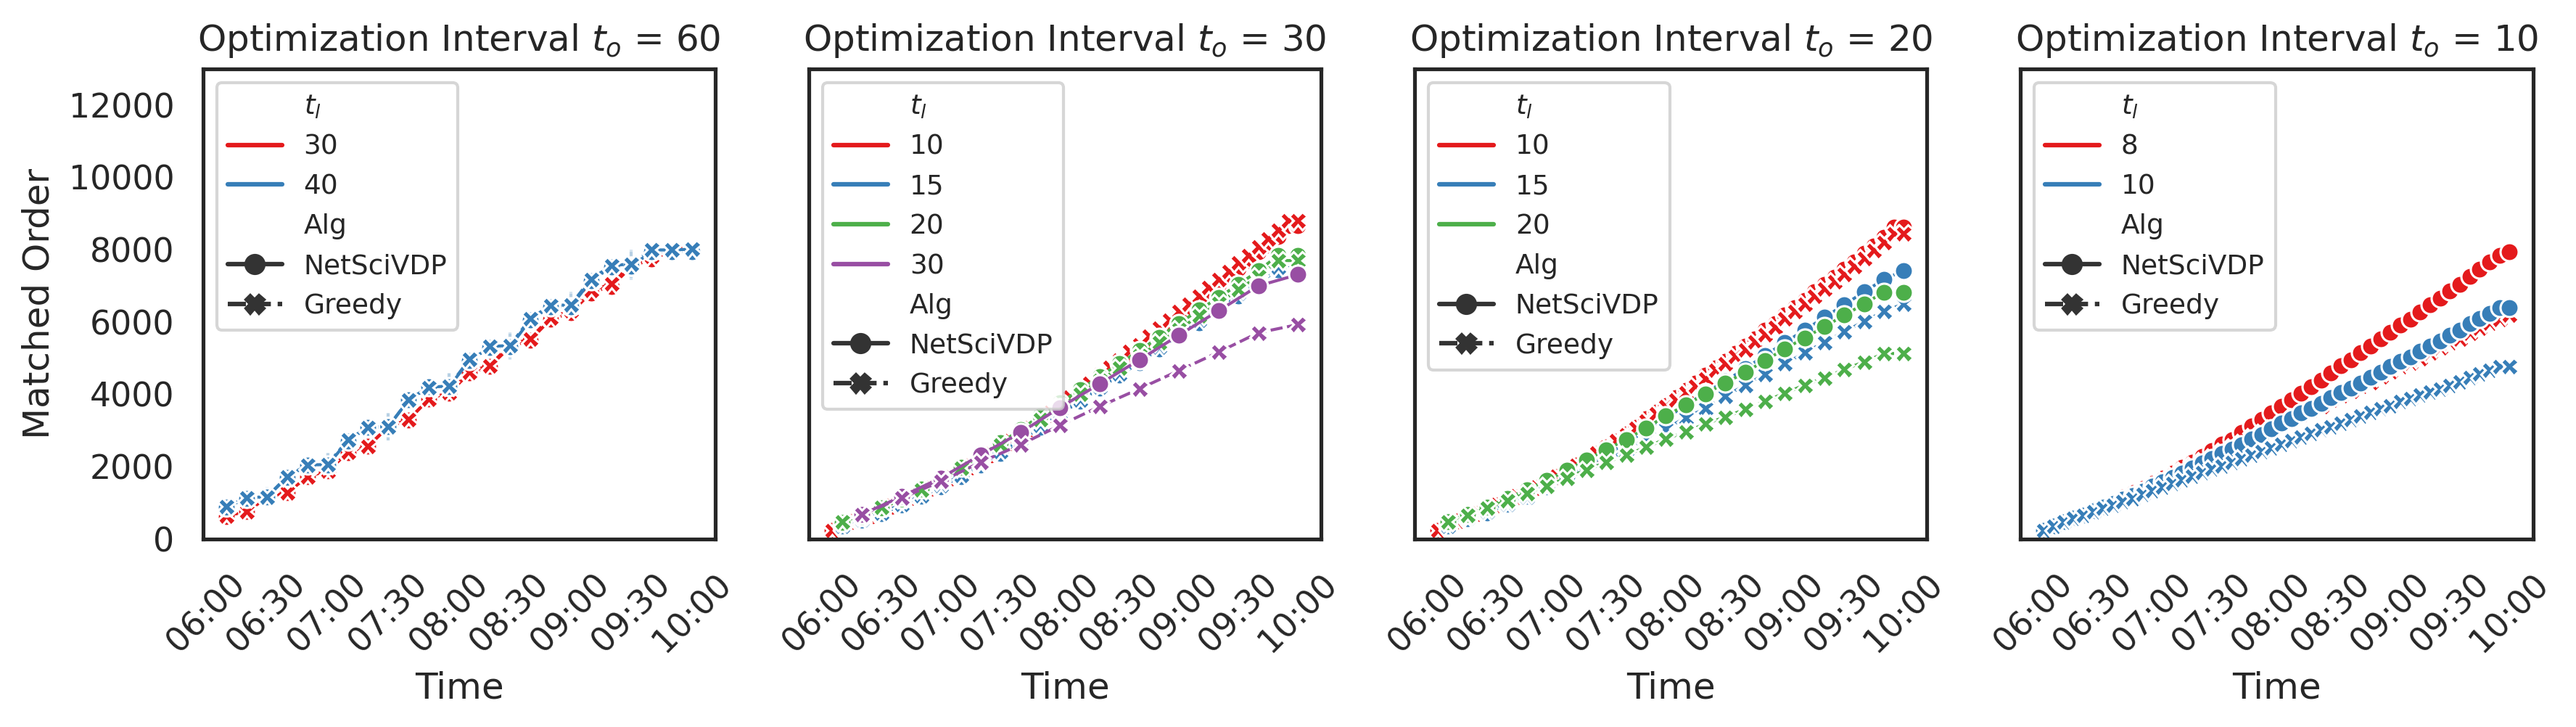

In [14]:
sns.set_theme(style="white")

df_for_match_plot = newdf[['opt', 'roll', 'locked', 'Alg', 'time', 'matched']]

fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey= True,  tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = df_for_match_plot[df_for_match_plot.opt == opt_int]
    temp.columns = ['$t_o$', '$t_r$', '$t_l$', 'Alg', 'time', 'matched']
    sns.lineplot(
        data=temp,
        x="time",
        y="matched",
        style="Alg",
        hue="$t_l$",
        ax=ax[i],
        palette="Set1",
        markers= True,
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (start_time, end_time)
    ax[i].set_ylim(0, 13000)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc = 'upper left', fontsize = 9)

plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_matched_order.png', dpi=300)

In [15]:
newdf

,opt,roll,locked,weight,time,matched,Alg
0,60,30,40,T,2022-06-10 06:30:00,875.0,NetSciVDP
1,60,30,40,T,2022-06-10 07:00:00,1709.0,NetSciVDP
2,60,30,40,T,2022-06-10 07:30:00,2726.0,NetSciVDP
3,60,30,40,T,2022-06-10 08:00:00,3852.0,NetSciVDP
4,60,30,40,T,2022-06-10 08:30:00,4946.0,NetSciVDP
...,...,...,...,...,...,...,...
731,60,10,30,F,2022-06-10 09:20:00,7231.0,Greedy
732,60,10,30,F,2022-06-10 09:30:00,7603.0,Greedy
733,60,10,30,F,2022-06-10 09:40:00,8037.0,Greedy
734,60,10,30,F,2022-06-10 09:50:00,8037.0,Greedy


In [16]:
newdf_t = newdf[newdf["weight"] == "T"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_f = newdf[newdf["weight"] == "F"].sort_values(by=["opt", "roll", "locked", "time"]).reset_index(drop=True)
newdf_t["matched_ratio"] = newdf_t["matched"] / newdf_f["matched"]
newdf_t = newdf_t[['opt', 'roll', 'locked', 'Alg', 'time', 'matched_ratio']]
newdf_t

,opt,roll,locked,Alg,time,matched_ratio
0,10,5,8,NetSciVDP,2022-06-10 06:05:00,1.000000
1,10,5,8,NetSciVDP,2022-06-10 06:10:00,1.000000
2,10,5,8,NetSciVDP,2022-06-10 06:15:00,0.988889
3,10,5,8,NetSciVDP,2022-06-10 06:20:00,0.985790
4,10,5,8,NetSciVDP,2022-06-10 06:25:00,0.991189
...,...,...,...,...,...,...
363,60,30,40,NetSciVDP,2022-06-10 08:00:00,0.996379
364,60,30,40,NetSciVDP,2022-06-10 08:30:00,0.991978
365,60,30,40,NetSciVDP,2022-06-10 09:00:00,0.991329
366,60,30,40,NetSciVDP,2022-06-10 09:30:00,0.991277


/tmp/ipykernel_31437/2255195104.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/2255195104.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/2255195104.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/2255195104.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


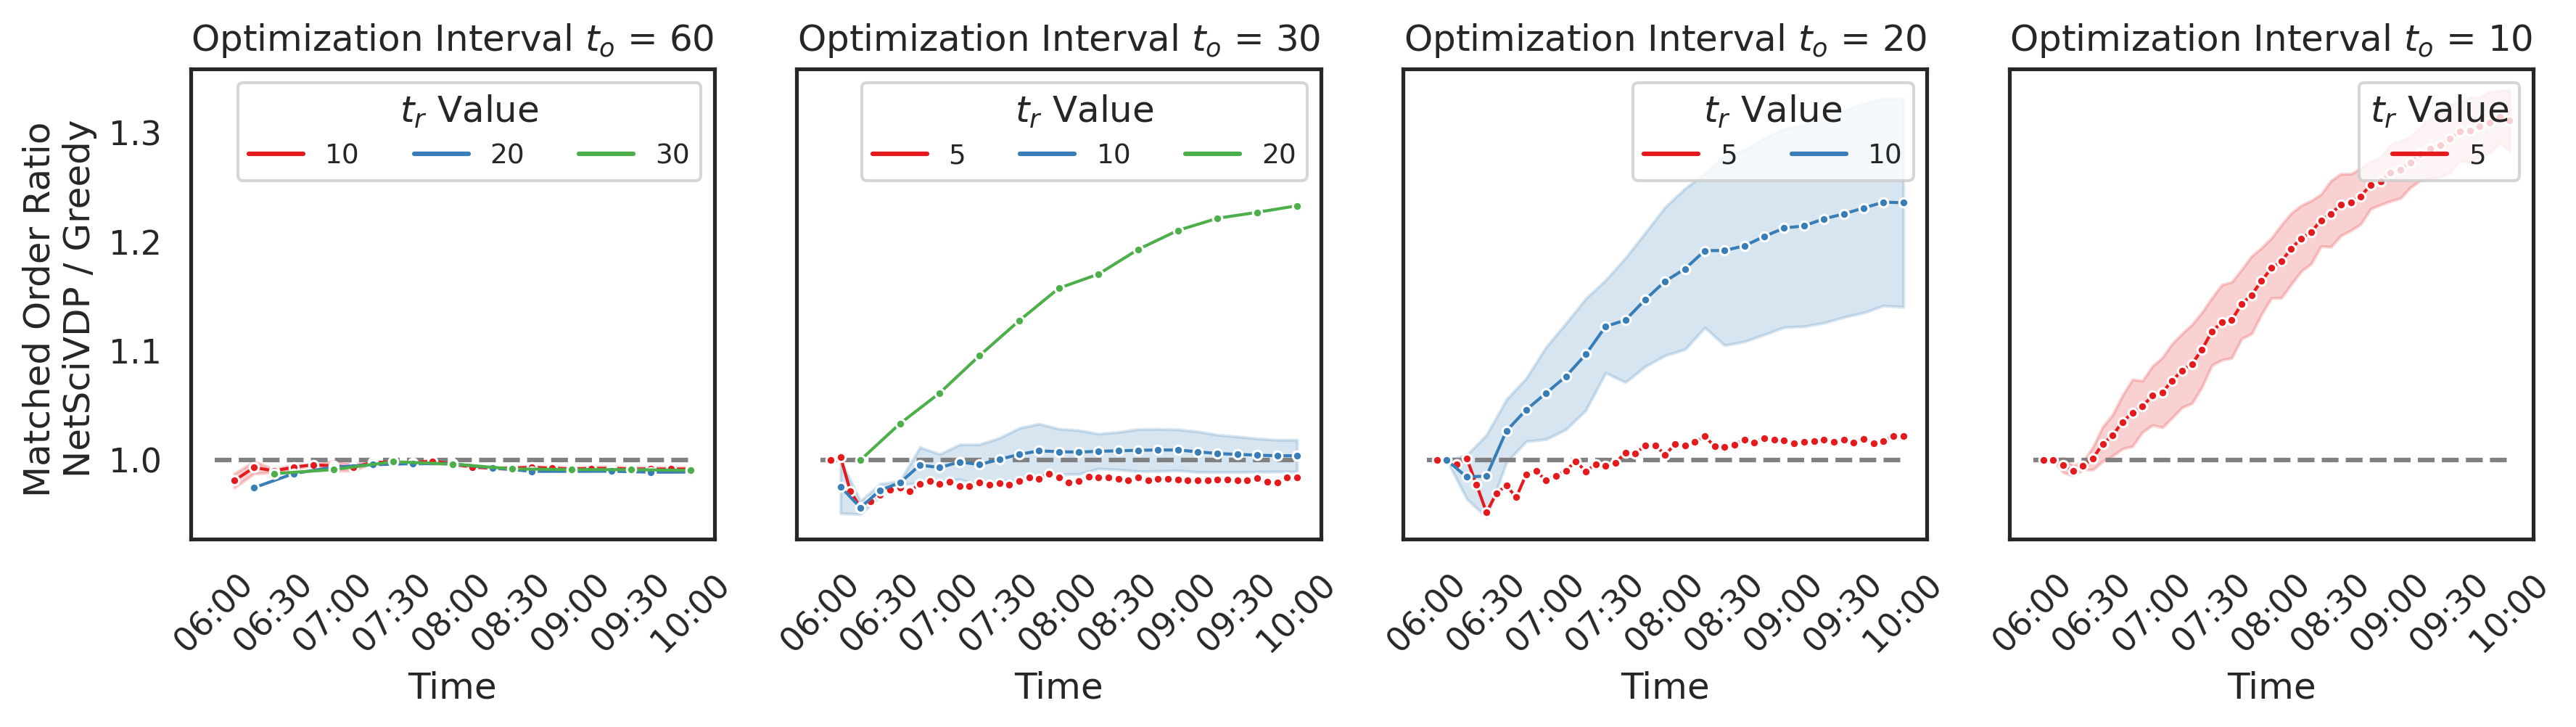

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = newdf_t[newdf_t.opt == opt_int]
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[start_time, end_time],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        # style="$t_r$",
        hue="$t_r$",
        ax=ax[i],
        palette="Set1",
        marker = '.',
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n NetSciVDP / Greedy")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (start_time, end_time)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc="upper right", ncol = 3, fontsize=9, title = "$t_r$ Value")


plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ "online_matched_order_ratio_tr.png", dpi=300)

/tmp/ipykernel_31437/727500989.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/727500989.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/727500989.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
/tmp/ipykernel_31437/727500989.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


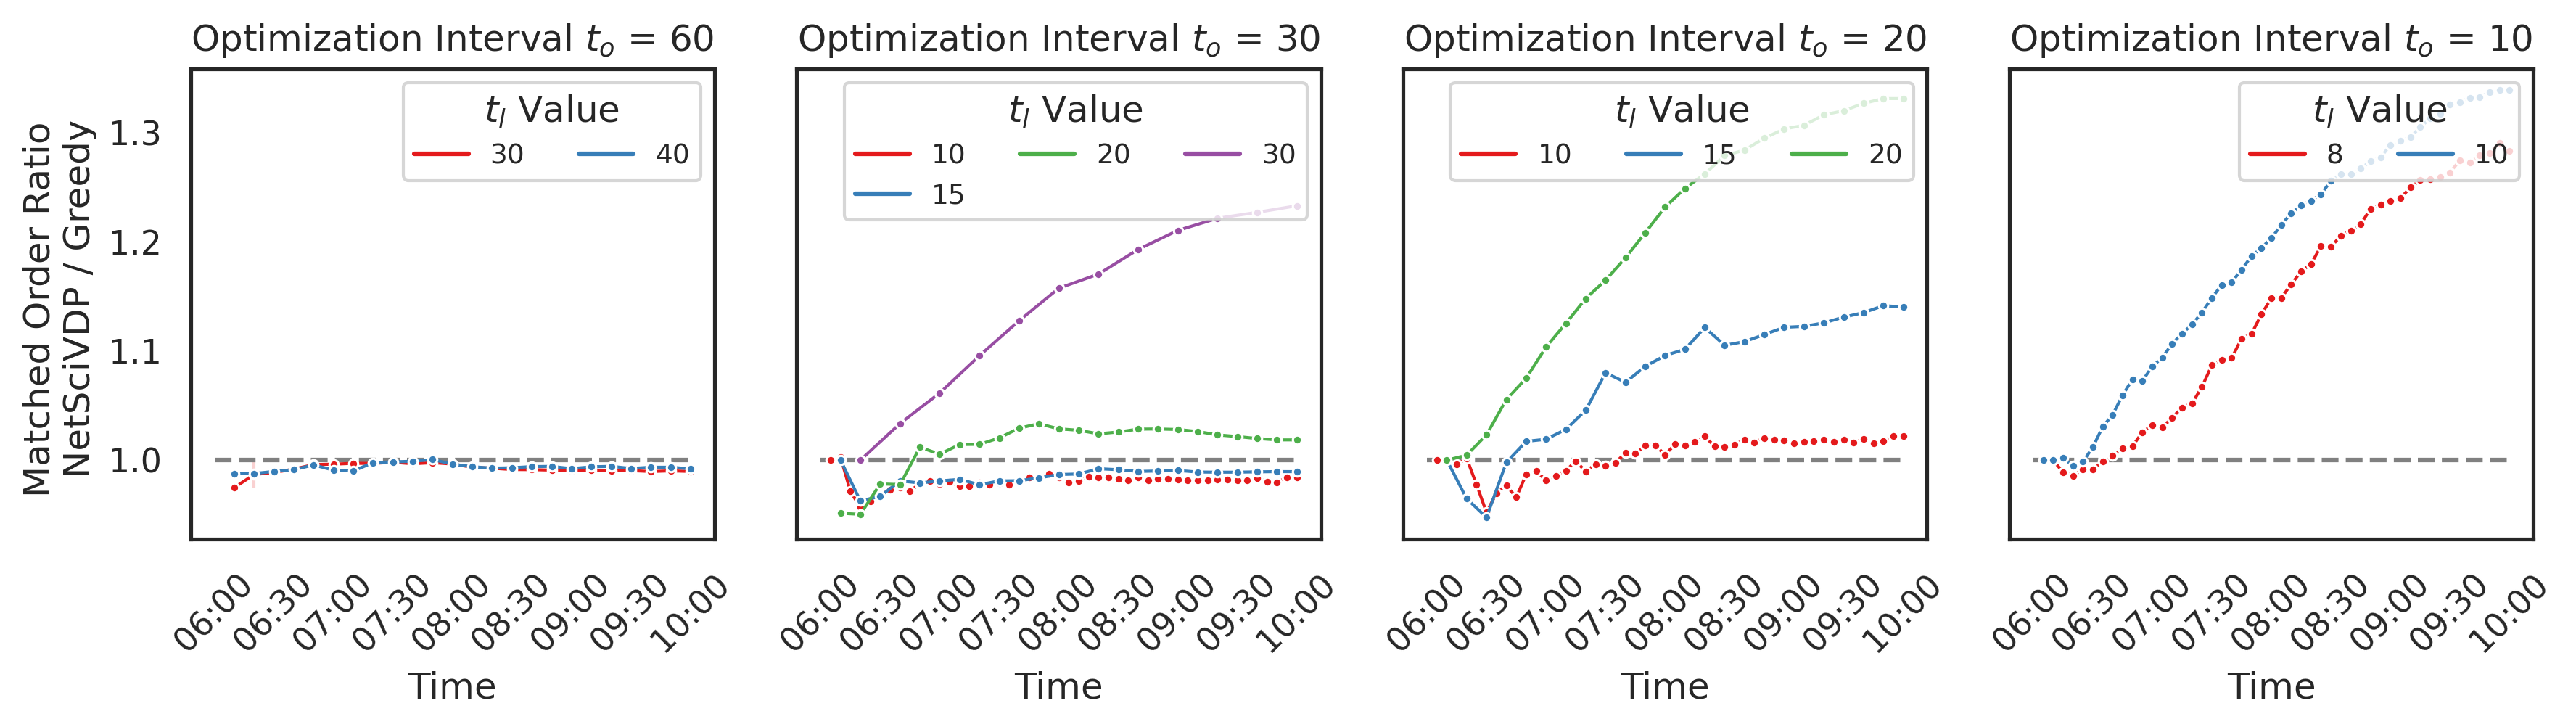

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3.5), facecolor="w", edgecolor="k", sharey=True, tight_layout=True, dpi=300)
ax = ax.ravel()
opt_list = [60, 30, 20, 10]

for i in range(len(opt_list)):
    opt_int = opt_list[i]
    temp = newdf_t[newdf_t.opt == opt_int]
    temp.columns = ["$t_o$", "$t_r$", "$t_l$", "Alg", "time", "matched_ratio"]
    sns.lineplot(
        x=[start_time, end_time],
        y=[1, 1],
        color="grey",
        linestyle="--",
        ax=ax[i],
    )

    sns.lineplot(
        data=temp,
        x="time",
        y="matched_ratio",
        # style="$t_r$",
        hue="$t_l$",
        ax=ax[i],
        palette="Set1",
        marker = '.',
        legend="full",
        # alpha=0.8,
        linewidth=1,
        # errorbar = None
    )
    
    ax[i].set_xlabel("Time")
    ax[i].set_ylabel("Matched Order Ratio \n NetSciVDP / Greedy")
    ax[i].set_title("Optimization Interval $t_o$ = " + str(opt_int))
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    ax[i].xlim = (start_time, end_time)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
    # ax[i].set_yscale("log")
    ax[i].legend(loc="upper right", ncol = 3, fontsize=9, title = "$t_l$ Value")


plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ "online_matched_order_ratio_tl.png", dpi=300)

/tmp/ipykernel_31437/3547066849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_df['RSR'] = match_df['matched'] / total_order


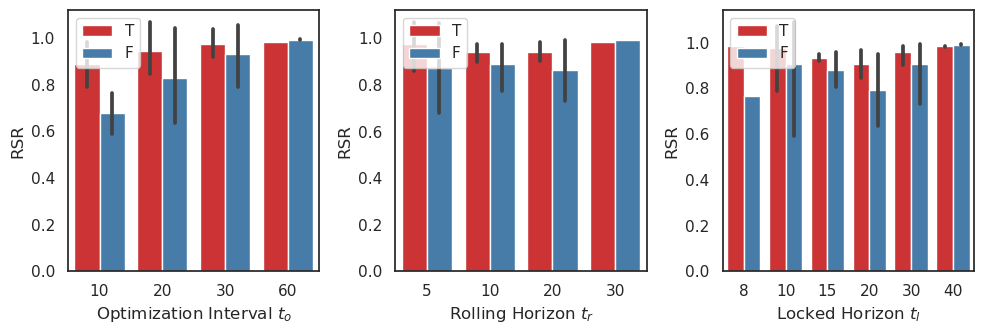

In [19]:
match_df = newdf[newdf['time'] == end_time]
match_df.columns = ['opt', 'roll', 'locked', '$w_{SP}$', 'time', 'matched', 'Alg']
match_df['RSR'] = match_df['matched'] / total_order
sns.set_theme(style="white")
fig, ax = plt.subplots(1,3, figsize=(10, 3.5), facecolor="w", edgecolor="k", tight_layout=True)
sns.barplot(data=match_df, x="opt", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[0])
ax[0].set_xlabel("Optimization Interval $t_o$")
ax[0].set_ylabel("RSR")
ax[0].legend(loc='upper left')
# ax[0].set_ylim(0.5, 1.05)

sns.barplot(data=match_df, x="roll", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[1])
ax[1].set_xlabel("Rolling Horizon $t_r$")
ax[1].set_ylabel("RSR")
ax[1].legend(loc='upper left')
# ax[1].set_ylim(0.5, 1.05)


sns.barplot(data=match_df, x="locked", y="RSR", hue="$w_{SP}$", palette="Set1", ax=ax[2])
ax[2].set_xlabel("Locked Horizon $t_l$")
ax[2].set_ylabel("RSR")
ax[2].legend(loc= 'upper left')
# ax[2].set_ylim(0.5, 1.05)

# sns.stripplot(x="Value", y="Case", hue="Vehicle", data=d_VMT_new,jitter=0.2 ,edgecolor='gray',palette  = [sns.color_palette('Set2')[7],sns.color_palette('Set2')[4]],
#                 # palette  = [sns.color_palette('Set2')[6]],
#                 size = 3.5, dodge=True, ax = ax2)
plt.savefig(rel_path + "online_result//"+ result_set[2] +"//result_analysis//"+ 'online_RSR.png', dpi=300)

In [20]:
match_df

,opt,roll,locked,$w_{SP}$,time,matched,Alg,RSR
7,60,30,40,T,2022-06-10 10:00:00,7958.0,NetSciVDP,0.984170
15,60,30,40,F,2022-06-10 10:00:00,8034.0,Greedy,0.993569
27,60,20,30,T,2022-06-10 10:00:00,7951.0,NetSciVDP,0.983304
39,60,20,30,F,2022-06-10 10:00:00,8039.0,Greedy,0.994187
63,30,10,20,T,2022-06-10 10:00:00,7841.0,NetSciVDP,0.969701
87,30,10,20,F,2022-06-10 10:00:00,7698.0,Greedy,0.952016
111,30,10,15,T,2022-06-10 10:00:00,7676.0,NetSciVDP,0.949295
135,30,10,15,F,2022-06-10 10:00:00,7758.0,Greedy,0.959436
183,30,5,10,T,2022-06-10 10:00:00,8658.0,NetSciVDP,1.070740
231,30,5,10,F,2022-06-10 10:00:00,8798.0,Greedy,1.088053
